In [424]:
import numpy as np 
import yfinance as yf
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
import matplotlib
%matplotlib inline


/tmp/ipykernel_1696984/3620799528.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [425]:
symbols = "SPY" , "KO", "GOOG", "NKE", "V", "CL", "QQQ", "MCD"
df_multiple_symbols = yf.download(symbols, start="2013-01-01", end="2023-01-01")

[*********************100%***********************]  8 of 8 completed


In [426]:
df_multiple_symbols.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-01-02 to 2022-12-30
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, CL)    2518 non-null   float64
 1   (Adj Close, GOOG)  2518 non-null   float64
 2   (Adj Close, KO)    2518 non-null   float64
 3   (Adj Close, MCD)   2518 non-null   float64
 4   (Adj Close, NKE)   2518 non-null   float64
 5   (Adj Close, QQQ)   2518 non-null   float64
 6   (Adj Close, SPY)   2518 non-null   float64
 7   (Adj Close, V)     2518 non-null   float64
 8   (Close, CL)        2518 non-null   float64
 9   (Close, GOOG)      2518 non-null   float64
 10  (Close, KO)        2518 non-null   float64
 11  (Close, MCD)       2518 non-null   float64
 12  (Close, NKE)       2518 non-null   float64
 13  (Close, QQQ)       2518 non-null   float64
 14  (Close, SPY)       2518 non-null   float64
 15  (Close, V)         2518 non-null   float64
 16  (High,

In [427]:
df_multiple_symbols = df_multiple_symbols["Close"]
df_multiple_symbols

,CL,GOOG,KO,MCD,NKE,QQQ,SPY,V
Date,,,,,,,,
2013-01-02,53.154999,18.013729,37.599998,90.120003,25.920000,67.199997,146.059998,38.845001
2013-01-03,53.330002,18.024191,37.599998,90.629997,26.184999,66.849998,145.729996,38.875000
2013-01-04,53.950001,18.380356,37.660000,89.849998,26.440001,66.629997,146.369995,39.192501
2013-01-07,53.040001,18.300158,37.299999,90.910004,26.480000,66.650002,145.970001,39.472500
2013-01-08,53.160000,18.264042,37.040001,90.940002,26.200001,66.519997,145.550003,39.840000
...,...,...,...,...,...,...,...,...
2022-12-23,79.449997,89.809998,63.820000,267.570007,116.250000,267.359985,382.910004,205.830002
2022-12-27,79.940002,87.930000,64.209999,266.839996,117.559998,263.579987,381.399994,206.289993
2022-12-28,78.820000,86.459999,63.570000,265.109985,114.980003,260.100006,376.660004,204.990005


In [428]:
#ainult SPY ja DataFrameks
df_multiple_symbols = pd.DataFrame(df_multiple_symbols['SPY']) 

In [429]:
df_multiple_symbols['SMA1'] = df_multiple_symbols['SPY'].rolling(55).mean() 
df_multiple_symbols['SMA2'] = df_multiple_symbols['SPY'].rolling(252).mean() 


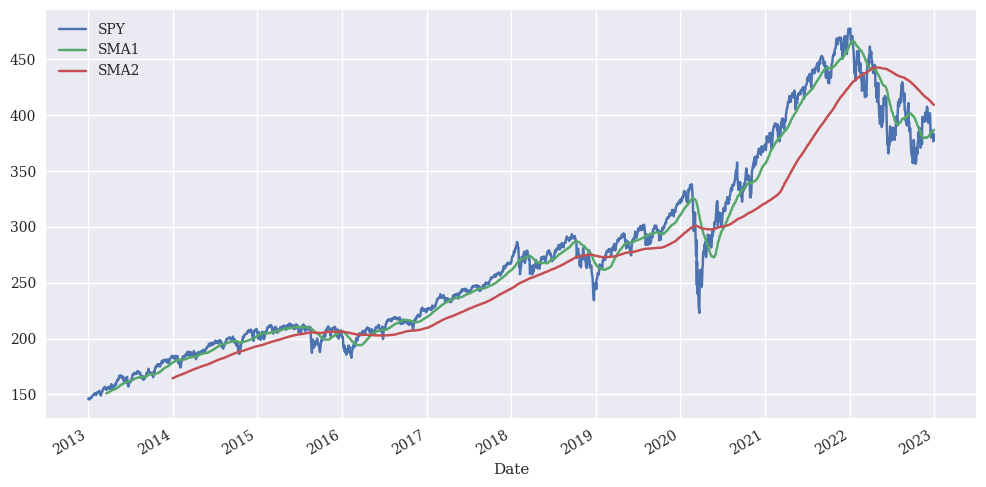

In [430]:
df_multiple_symbols.plot(figsize=(12, 6));

In [431]:
df_multiple_symbols.tail()

,SPY,SMA1,SMA2
Date,,,
2022-12-23,382.910004,385.369637,410.678811
2022-12-27,381.399994,385.708000,410.298414
2022-12-28,376.660004,386.010546,409.900755
2022-12-29,383.440002,386.477819,409.527580
2022-12-30,382.429993,386.948182,409.155636


/tmp/ipykernel_1696984/3201822249.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


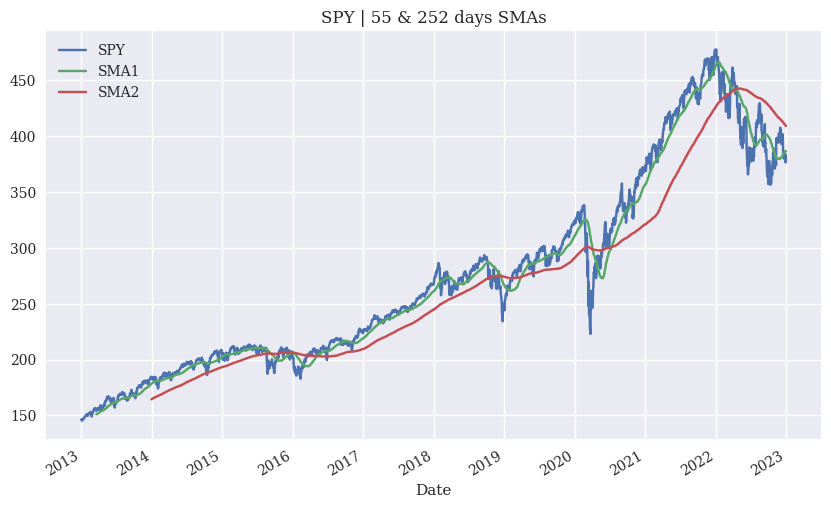

In [432]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
df_multiple_symbols.plot(title='SPY | 55 & 252 days SMAs',
figsize=(10, 6));

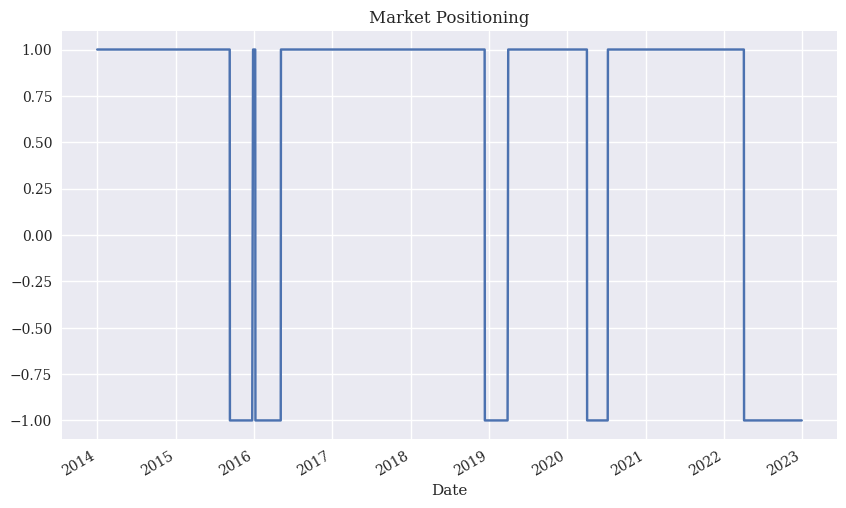

In [433]:
df_multiple_symbols['position'] = np.where(df_multiple_symbols['SMA1'] > df_multiple_symbols['SMA2'], 1, -1)
df_multiple_symbols.dropna(inplace=True) 
df_multiple_symbols['position'].plot(ylim=[-1.1, 1.1],title='Market Positioning',figsize=(10, 6));

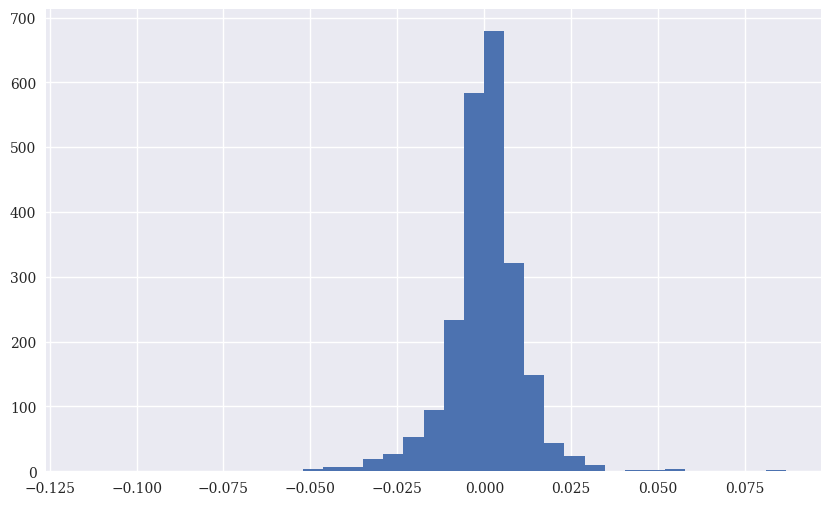

In [434]:
df_multiple_symbols['returns'] = np.log(df_multiple_symbols['SPY'] / df_multiple_symbols['SPY'].shift(1)) 
df_multiple_symbols['returns'].hist(bins=35, figsize=(10, 6)); 

In [435]:
df_multiple_symbols['strategy'] = df_multiple_symbols['position'].shift(1) * df_multiple_symbols['returns'] 
df_multiple_symbols[['returns', 'strategy']].sum()


returns     0.727867
strategy    0.213307
dtype: float64

In [436]:
df_multiple_symbols[['returns', 'strategy']].sum().apply(np.exp) 

returns     2.070659
strategy    1.237765
dtype: float64

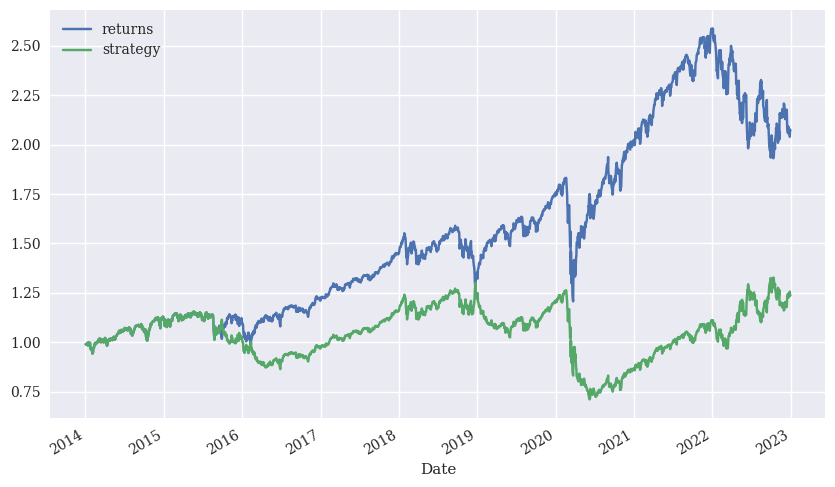

In [437]:
df_multiple_symbols[['returns', 'strategy']].cumsum( ).apply(np.exp).plot(figsize=(10, 6));

In [438]:
df_multiple_symbols[['returns', 'strategy']].mean() * 252 

returns     0.080945
strategy    0.023722
dtype: float64

In [439]:
np.exp(df_multiple_symbols[['returns', 'strategy']].mean() * 252) - 1 

returns     0.084312
strategy    0.024005
dtype: float64

In [440]:
df_multiple_symbols[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.180899
strategy    0.180965
dtype: float64

In [441]:
(df_multiple_symbols[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5 

returns     0.180228
strategy    0.180244
dtype: float64

In [442]:
df_multiple_symbols['cumret'] = df_multiple_symbols['strategy'].cumsum().apply(np.exp) 

In [443]:
df_multiple_symbols['cummax'] = df_multiple_symbols['cumret'].cummax() 

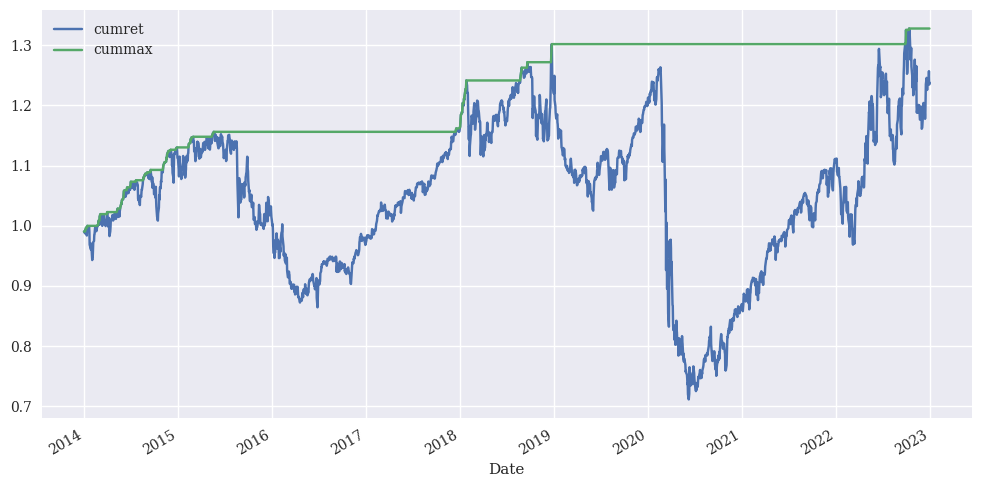

In [444]:
df_multiple_symbols[['cumret', 'cummax']].dropna().plot(figsize=(12, 6));

In [445]:
drawdown = df_multiple_symbols['cummax'] - df_multiple_symbols['cumret']
drawdown.max() 

0.5900660502583578

In [446]:
temp = drawdown[drawdown == 0] 

In [447]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime()) 

In [448]:
import numpy as np
import pandas as pd
from scipy.optimize import brute
import yfinance as yf
 
class SMAVectorBacktester(object):

    def __init__(self, symbol, SMA1, SMA2, start, end):
        self.symbol = symbol
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.start = start
        self.end = end
        self.results = None
        self.get_data()

    def get_data(self):

        symbols = "SPY", "KO"
        raw = yf.download(symbols, start="2013-01-01", end="2023-01-01")
        raw = raw["Close"]
        raw = pd.DataFrame(raw[self.symbol])
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        raw['SMA1'] = raw['price'].rolling(self.SMA1).mean()
        raw['SMA2'] = raw['price'].rolling(self.SMA2).mean()
        self.data = raw

    def set_parameters(self, SMA1=None, SMA2=None):

        if SMA1 is not None:
            self.SMA1 = SMA1
            self.data['SMA1'] = self.data['price'].rolling(
                self.SMA1).mean()
        if SMA2 is not None:
            self.SMA2 = SMA2
            self.data['SMA2'] = self.data['price'].rolling(self.SMA2).mean()

    def run_strategy(self):

        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['return']
        data.dropna(inplace=True)
        data['creturns'] = data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # gross performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - data['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):

        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | SMA1=%d, SMA2=%d' % (self.symbol,
        self.SMA1, self.SMA2)
        self.results[['creturns', 'cstrategy']].plot(title=title,
        figsize=(10, 6))

    def update_and_run(self, SMA):

        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.run_strategy()[0]

    def optimize_parameters(self, SMA1_range, SMA2_range):

        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)

if __name__ == '__main__':
    smabt = SMAVectorBacktester("SPY", 42, 252, "2013-01-01","2023-01-01")
    print(smabt.run_strategy())
    smabt.set_parameters(SMA1=20, SMA2=100)
    print(smabt.run_strategy())
    print(smabt.optimize_parameters((30, 56, 4), (200, 300, 4)))


[*********************100%***********************]  2 of 2 completed
(1.39, -0.68)
(1.03, -1.28)
(array([ 46., 240.]), 1.51)


In [449]:
SMAVectorBacktester

__main__.SMAVectorBacktester

In [450]:
smabt = SMAVectorBacktester('SPY', 42, 252, "2013-1-1", "2019-12-31")

[*********************100%***********************]  2 of 2 completed


In [451]:
smabt.run_strategy()

(1.22, -0.52)

In [452]:
%%time
smabt.optimize_parameters((30, 50, 2),(200, 300, 2)) 

CPU times: user 4.14 s, sys: 31.1 ms, total: 4.17 s
Wall time: 5.55 s


(array([ 32., 216.]), 1.55)

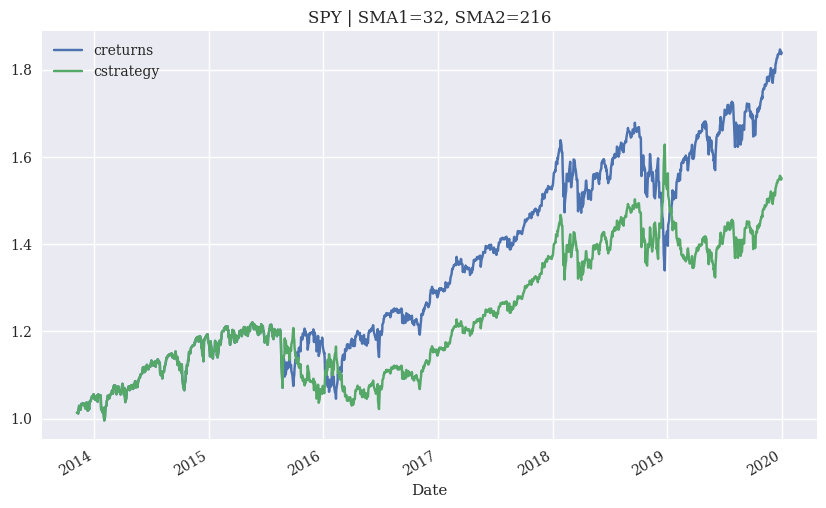

In [453]:
smabt.plot_results() 

In [454]:
#momentum strategies

In [455]:
data = pd.DataFrame(df_multiple_symbols['SPY'])

In [456]:
data.rename(columns={'SPY': 'price'}, inplace=True)

In [457]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [458]:
data['position'] = np.sign(data['returns']) 

In [459]:
data['strategy'] = data['position'].shift(1) * data['returns'] 

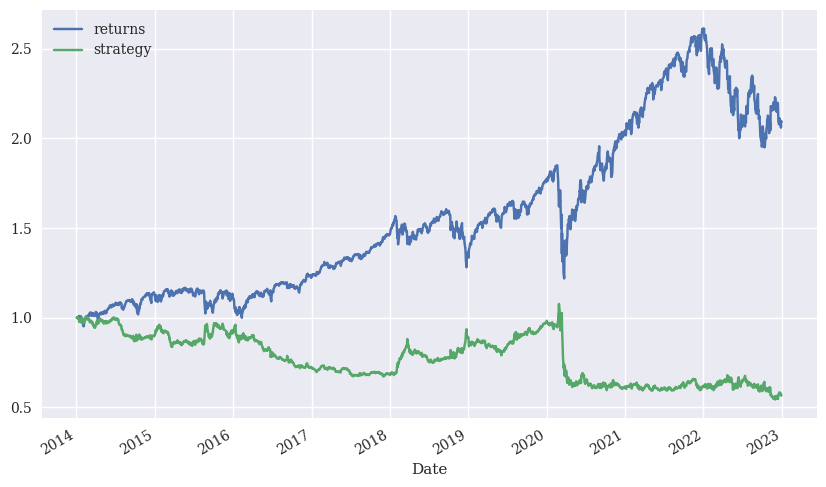

In [460]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6)); 

In [470]:
data['position'] = np.sign(data['returns'].rolling(3).mean()) 

In [471]:
data['strategy'] = data['position'].shift(1) * data['returns']

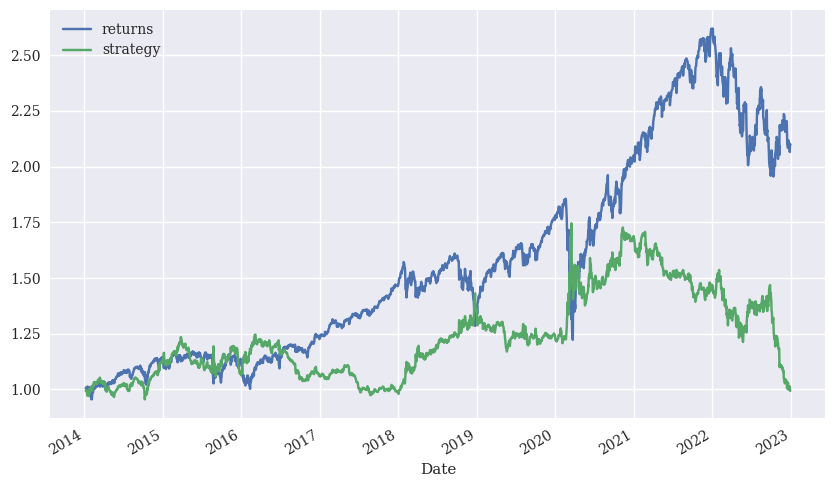

In [472]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));